In [101]:
import pandas as pd
import numpy as np

import time
import datetime

import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [102]:
df_t = pd.read_csv('data/transactions_train.csv')
df_a = pd.read_csv('data/articles.csv')

KeyboardInterrupt: 

In [ ]:
def convert_time(t_date):
    return time.mktime(datetime.datetime.strptime(t_date,"%Y-%m-%d").timetuple())

start_time = time.mktime(datetime.datetime.strptime('2020-01-01',"%Y-%m-%d").timetuple())

temp = list(map(convert_time, df_t['t_dat']))

In [ ]:
df_t_2020 = df_t.copy()
df_t_2020['time'] = temp
df_t_2020 = df_t_2020[df_t_2020['time'] >= start_time].dropna().reset_index(drop=True)
df_t_2020

,t_dat,customer_id,article_id,price,sales_channel_id,time
0,2020-01-01,0034b3dced3e565a43438bdfb5447e7321fea65388b398...,835247001,0.033881,2,1.577855e+09
1,2020-01-01,00410b91d62eefa76958fa5cac12f5daa7cfc0556e417d...,802930002,0.067780,2,1.577855e+09
2,2020-01-01,00410b91d62eefa76958fa5cac12f5daa7cfc0556e417d...,760084008,0.025407,2,1.577855e+09
3,2020-01-01,004b0fb384bcab2f8e1059dd5ca68c17580365ab95c05a...,804662002,0.033881,2,1.577855e+09
4,2020-01-01,004b0fb384bcab2f8e1059dd5ca68c17580365ab95c05a...,801554002,0.016932,2,1.577855e+09
...,...,...,...,...,...,...
10980127,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,1.600747e+09
10980128,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,1.600747e+09
10980129,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,1.600747e+09
10980130,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1,1.600747e+09


In [ ]:
df_t_subset = df_t_2020.sample(frac=0.01, random_state=9).reset_index(drop=True)
df_t_subset

,t_dat,customer_id,article_id,price,sales_channel_id,time
0,2020-04-12,df74d446d3961a9bbd0828b0a48dd66af52fa65d9083d3...,706016002,0.033881,2,1.586664e+09
1,2020-02-14,d957d140e59e4b586b0674a0d73d6a5a3cb71d31c711a7...,803772001,0.011847,1,1.581656e+09
2,2020-08-01,97c6008bc26af30a787551f25ac1aac74fa31b1d1dc806...,853881002,0.016932,1,1.596254e+09
3,2020-08-13,ad363614ee32655c69ab920b92252c28076498059e2af6...,574109012,0.008458,2,1.597291e+09
4,2020-01-02,8eb8bb8546979bfbc24fd97d42aed26eec8d8f01c3bd5a...,697050021,0.010153,2,1.577941e+09
...,...,...,...,...,...,...
109796,2020-06-25,6d57db88d6deea16ebc6daf3fadd9b6c865f52c38bfd47...,808699001,0.020322,1,1.593058e+09
109797,2020-06-25,0fb8c776fd94f12c6ac558e5a1151de20a95e3afc41d9f...,901607001,0.012186,2,1.593058e+09
109798,2020-06-04,cc1247ea1655a9224287cf88a66dd2a4b325e7aa4dde97...,824764001,0.025407,2,1.591243e+09
109799,2020-01-26,8a39eab6c929cd59596f3359e8ca6c82d5c2510c5ad629...,729928013,0.011339,2,1.580015e+09


In [ ]:
df_a_2020 = df_a.copy()
df_a_2020 = df_a_2020[df_a_2020['article_id'].isin(df_t_subset['article_id'].unique())].dropna().reset_index(drop=True)
df_a_2020

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
2,111565001,111565,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
3,111586001,111586,Shape Up 30 den 1p Tights,273,Leggings/Tights,Garment Lower body,1010016,Solid,9,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Tights with built-in support to lift the botto...
4,111593001,111593,Support 40 den 1p Tights,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny tights that shape the tummy, thighs..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23103,947599001,947599,ED Duno 2p.,254,Top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,"Long-sleeved tops in soft, organic cotton jers..."
23104,947934001,947934,Ciara Lace Tights,304,Underwear Tights,Socks & Tights,1010021,Lace,9,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Tights in soft lace with an elasticated waist.
23105,949198001,949198,Saturday jogger,272,Trousers,Garment Lower body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Joggers in sweatshirt fabric made from a cotto...
23106,949551001,949551,Virgo sweater fast buy,252,Sweater,Garment Upper body,1010016,Solid,9,Black,...,Tops Fancy Jersey,D,Divided,2,Divided,53,Divided Collection,1005,Jersey Fancy,"Short, boxy-style top in sweatshirt fabric mad..."


In [ ]:
#Clean the strings to remove punctation, remove common words, and lowercase
def clean_string(text):
    text = text.replace('’', '\'')
#     text = contractions.fix(text)
    text = ''.join([word for word in text if word not in string.punctuation])
    text = text.lower()
    return text

In [ ]:
df_a_2020['clean_desc'] = list(map(clean_string, df_a_2020['detail_desc']))

In [ ]:
tf = TfidfVectorizer(ngram_range = (1, 3), min_df = 0, stop_words = 'english')
tfidf_matrix = tf.fit_transform(df_a_2020['clean_desc'])
cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [109]:
df_cos_sim = pd.DataFrame(cos_sim)
df_cos_sim

,0,1,2,3,4,5,6,7,8,9,...,23098,23099,23100,23101,23102,23103,23104,23105,23106,23107
0,1.000000,0.067382,0.000000,0.000000,0.000000,0.000000,0.011800,0.011800,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.017060,0.000000,0.000000,0.000000,0.026150
1,0.067382,1.000000,0.000000,0.006367,0.006738,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.007077,0.004978,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007537
2,0.000000,0.000000,1.000000,0.034341,0.079184,0.028310,0.004003,0.004003,0.022906,0.0,...,0.010071,0.000000,0.009672,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003438
3,0.000000,0.006367,0.034341,1.000000,0.011748,0.075109,0.000000,0.000000,0.060771,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022311,0.000000,0.000000,0.000000
4,0.000000,0.006738,0.079184,0.011748,1.000000,0.019369,0.017373,0.017373,0.079741,0.0,...,0.001939,0.000000,0.001494,0.002489,0.000000,0.000000,0.050182,0.010667,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23103,0.017060,0.000000,0.000000,0.000000,0.000000,0.000000,0.035108,0.035108,0.000000,0.0,...,0.004504,0.000000,0.000000,0.006004,0.022243,1.000000,0.007960,0.009086,0.010294,0.012512
23104,0.000000,0.000000,0.000000,0.022311,0.050182,0.036785,0.009767,0.009767,0.029763,0.0,...,0.008439,0.000000,0.002837,0.004726,0.000000,0.007960,1.000000,0.016558,0.005334,0.000000
23105,0.000000,0.000000,0.000000,0.000000,0.010667,0.000000,0.018169,0.018169,0.000000,0.0,...,0.010758,0.000000,0.004511,0.030943,0.085672,0.009086,0.016558,1.000000,0.152431,0.000000
23106,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007120,0.007120,0.000000,0.0,...,0.102047,0.000000,0.000000,0.004023,0.121612,0.010294,0.005334,0.152431,1.000000,0.014085


In [110]:
from sklearn.cluster import KMeans
cs = []
for i in range(11, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_cos_sim)
    cs.append(kmeans.inertia_)
    

ValueError: x and y must have same first dimension, but have shapes (10,) and (2,)

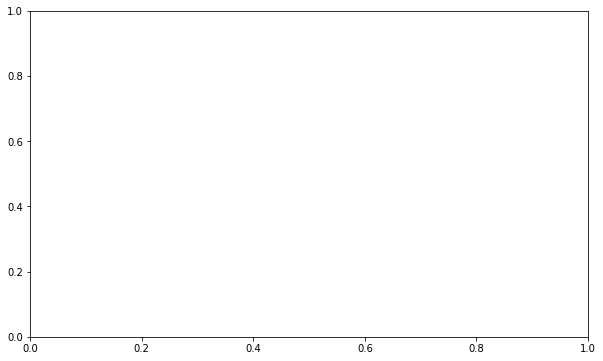

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(11, 21), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

pca = PCA(2)

transform = pca.fit_transform(df_cos_sim)

#Initialize the class object
kmeans = KMeans(n_clusters = 11)
 
#predict the labels of clusters.
label = kmeans.fit_predict(transform)
 
#Getting unique labels
u_labels = np.unique(label)

data = {'article_id': df_a_2020['article_id'],'cluster': label}
cluster_list = pd.DataFrame(data)
cluster_list

KeyboardInterrupt: 

In [ ]:
cluster_list.to_csv('cluster_list.csv')

In [105]:
# cluster_list = pd.read_csv('cluster_list.csv')

In [106]:
cluster_list['cluster'].value_counts()

10    4957
0     4737
12    2361
15    2357
8     1792
5     1120
6     1040
3      832
1      748
11     713
9      591
2      585
4      489
7      340
13     282
14     164
Name: cluster, dtype: int64

In [100]:
def recommend(article_id):
    cluster = cluster_list[cluster_list['article_id'] == article_id]['cluster'][0]
    return cluster_list[cluster_list['cluster'] == cluster]['article_id']

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

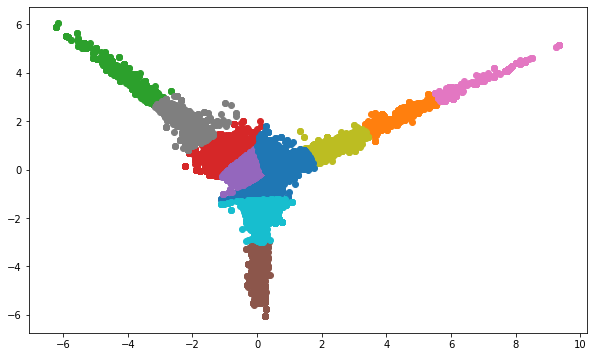

In [107]:
#plotting the results:
plt.figure(figsize=(10,6))
for i in u_labels:
    plt.scatter(transform[label == i , 0] , transform[label == i , 1] , label = i)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='+',label='centroid')
plt.legend()
# plt.savefig('cluster.png')
plt.show()

In [108]:
recommend(cluster_list['article_id'][0])

0        108775044
52       188183001
53       188183015
54       188183018
55       188183021
           ...    
22718    922408001
22775    923813001
22779    924083002
22876    927553002
23014    934154002
Name: article_id, Length: 1792, dtype: int64

In [38]:
cluster = cluster_list[cluster_list['article_id'] == cluster_list['article_id'][0]]['cluster'][0]
cluster_list[cluster_list['cluster'] == 5]['article_id']

0        108775044
52       188183001
53       188183015
54       188183018
55       188183021
           ...    
22718    922408001
22775    923813001
22779    924083002
22876    927553002
23014    934154002
Name: article_id, Length: 1800, dtype: int64

In [50]:
df_t_subset

,t_dat,customer_id,article_id,price,sales_channel_id,time
0,2020-04-12,df74d446d3961a9bbd0828b0a48dd66af52fa65d9083d3...,706016002,0.033881,2,1.586664e+09
1,2020-02-14,d957d140e59e4b586b0674a0d73d6a5a3cb71d31c711a7...,803772001,0.011847,1,1.581656e+09
2,2020-08-01,97c6008bc26af30a787551f25ac1aac74fa31b1d1dc806...,853881002,0.016932,1,1.596254e+09
3,2020-08-13,ad363614ee32655c69ab920b92252c28076498059e2af6...,574109012,0.008458,2,1.597291e+09
4,2020-01-02,8eb8bb8546979bfbc24fd97d42aed26eec8d8f01c3bd5a...,697050021,0.010153,2,1.577941e+09
...,...,...,...,...,...,...
109796,2020-06-25,6d57db88d6deea16ebc6daf3fadd9b6c865f52c38bfd47...,808699001,0.020322,1,1.593058e+09
109797,2020-06-25,0fb8c776fd94f12c6ac558e5a1151de20a95e3afc41d9f...,901607001,0.012186,2,1.593058e+09
109798,2020-06-04,cc1247ea1655a9224287cf88a66dd2a4b325e7aa4dde97...,824764001,0.025407,2,1.591243e+09
109799,2020-01-26,8a39eab6c929cd59596f3359e8ca6c82d5c2510c5ad629...,729928013,0.011339,2,1.580015e+09


In [ ]:
df_c = pd.read_csv('data/customers.csv')

In [55]:
df_c['customer_id'].nunique()

1371980

In [57]:
submission = pd.DataFrame()
submission['customer_id'] = df_c['customer_id'].unique()

In [ ]:
for customer in submission['customer_id']:
    if customer in df_c['customer_id'].unique()

In [76]:
submission['customer_id'][0]

'00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657'

In [83]:
for i in range(len(df_c['customer_id'])):
    if df_c['customer_id'][i] in df_t_subset['customer_id'].unique():
        print(i)
        break

13


In [86]:
submission['customer_id'][13] in df_c['customer_id'].unique()

True

In [ ]:
df_ct = pd.DataFrame(columns=['customer_id', 'articles'])

customer_id = []
articles = []

for c in df_t_subset['customer_id'].unique():
    customer_id.append(c)
    articles.append(df_t[df_t['customer_id'] == c]['article_id'])

df_ct['customer_id'] = customer_id
df_ct['articles'] = articles

KeyboardInterrupt: 